# Polynomial Regression

# importing the libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


# making the dataset

In [21]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)
#x,y
#y=0.8*X**2+0.9*X+2

# plotting 

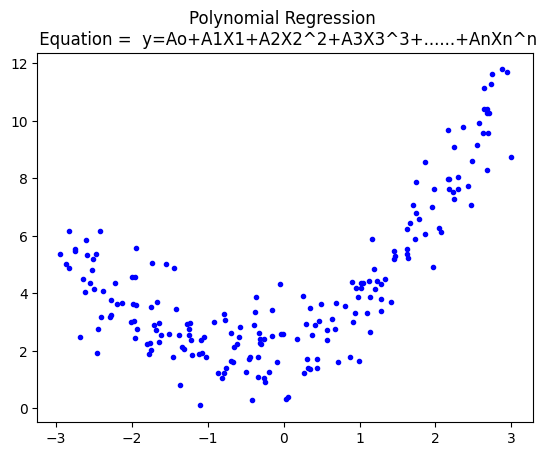

In [22]:
plt.plot(X,y,'b.')
plt.title("Polynomial Regression \n Equation =  y=Ao+A1X1+A2X2^2+A3X3^3+......+AnXn^n")
plt.show()

# splitting the datas

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Linear regression

In [24]:
lr = LinearRegression()

# fitting into linear regression

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

# predicting

In [26]:
y_pred = lr.predict(X_test)
print("The R^2 is : ",r2_score(y_test,y_pred))

The R^2 is :  0.44503277895756355


# plotting

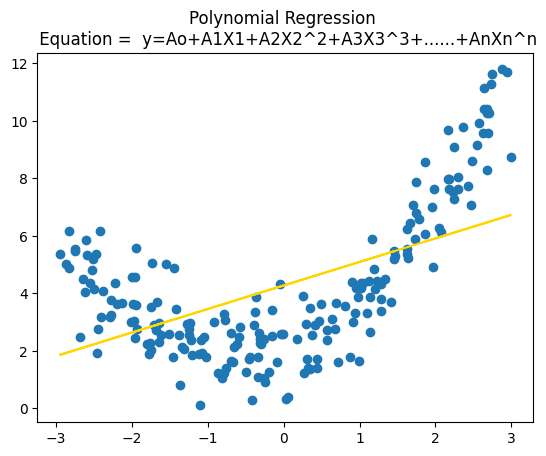

In [27]:
plt.plot(X_train,lr.predict(X_train),'gold')
plt.title("Polynomial Regression \n Equation =  y=Ao+A1X1+A2X2^2+A3X3^3+......+AnXn^n")
plt.scatter(X,y)
plt.show()

# applying polynomial

In [28]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

print(X_train[0])
print(X_train_trans[0])

[1.86232487]
[1.         1.86232487 3.46825391]


In [29]:
lr =  LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test_trans)

r2_score(y_test,y_pred)

0.8961669641875746

In [31]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89709984 0.71908311]]
[2.24973089]


In [32]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# plotting

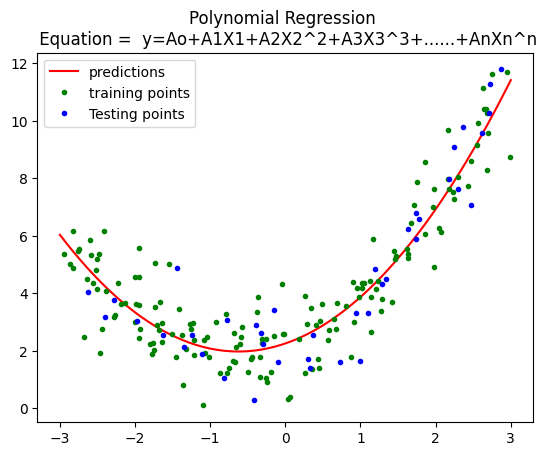

In [33]:
plt.plot(X_new,y_new,"r-",label="predictions")
plt.title("Polynomial Regression \n Equation =  y=Ao+A1X1+A2X2^2+A3X3^3+......+AnXn^n")
plt.plot(X_train,y_train,"g.",label="training points")
plt.plot(X_test,y_test,"b.",label="Testing points")
plt.legend()
plt.show()

# for other degress too

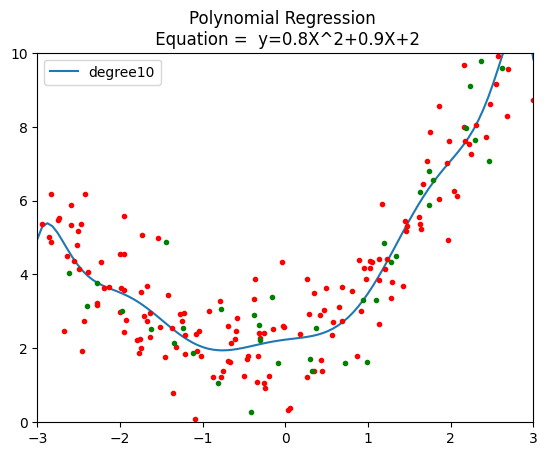

In [34]:
def polynomial_regr(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scalar = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regr = Pipeline([
        ("poly-features",polybig_features),
        ("std-scalar",std_scalar),
        ("lin-reg",lin_reg)
    ])
    polynomial_regr.fit(X,y)
    y_newbig = polynomial_regr.predict(X_new) 
    plt.plot(X_new,y_newbig,label="degree"+str(degree))

    plt.plot(X_train,y_train,"r.")
    plt.title("Polynomial Regression \n Equation =  y=0.8X^2+0.9X+2")
    plt.plot(X_test,y_test,"g.")
    plt.legend(loc='upper left')
    plt.axis([-3,3,0,10])
    plt.show()

#deg = int(input('Enter the degree : '))
polynomial_regr(10)

### 3D polynomial regression

In [35]:
x = 7*np.random.rand(100,1)-2.8
y = 7*np.random.rand(100,1)-2.8

z = x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.randn(100,1)
# z= x^2+y^0.2x+0.2y+0.1xy+2


In [36]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
#fig.show()

### simple linear regression

In [38]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)
x_input= np.linspace(x.min(),x.max(),10)
y_input= np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

In [39]:
import plotly.graph_objects as go

fig = px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))

### Deg 2

In [40]:
x_multi = np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [41]:
poly = PolynomialFeatures(degree=5)
x_multi_trans = poly.fit_transform(x_multi)


In [42]:
print("input",poly.n_features_in_)
print("output",poly.n_output_features_)
print("power\n",poly.powers_)

input 2
output 21
power
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]]


In [43]:
x_multi_trans.shape

(100, 21)

In [44]:
lr = LinearRegression()
lr.fit(x_multi_trans,z)

LinearRegression()

In [45]:
x_test_multi = poly.transform(final)

In [46]:
z_final = lr.predict(x_multi_trans).reshape(10,10)

In [47]:
fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())

In [49]:
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))